# 1. Model Evaluation

- In-sample evaluation (in previous week's course)
- Out-of-sample evaluation (today's course)

> Note: In-Sample Model Evaluation can only tell us how well model fits the training data (i.e. data to generate the model), cannot tell how well model performs in testing dataset (Out-of-sample evaluation).

## 1.1. Out-of-sample Evaluation

### Train-test split

```python
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0) 
```

### Cross-validation

#### a). Cross-validation score:

```python
from sklearn.model_selection import cross_val_sc
scores= cross_val_score(lr, x_data, y_data, cv=10) #10-fold, split data to 10 folds
avg_score=np.mean(scores) #average accuracy of train-testing splitting using cross-validation method instead of using train_test_split)
```

> benefit: cross-validation can auto iterate multiple times (i.e. doing n times train_test_split), each time picking different subset of whole data as testing dataset and finally get the average **accuracy score (e.g. R2, MSE)** ***[Note: from last week's course, for continuous value model, accuracy can be represented by R2 or MSE]***

> Tips: The default score cross_val_score() function returns is R2, unless specified otherwise

#### b). Cross-validation prediction:
- exact same input as cross_val_score, the output is prediction for each fold when that fold is using for testing dataset.

```python
from sklearn.model_selection import cross_val_predict
yhat= cross_val_predict(lr, x_data, y_data, cv=10) #10-fold, split data to 10 folds
#yhat contains 10 elements, each element is the predictions (array form) of each fold
```

# 2. Overfitting, Underfitting and Model Selection

# 3. Ridge Regression (to reduce overfitting)

- Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated (aka. multicollinear)
- This is to solve the overfitting problem a regular polynomial regression usually faces, because consider this model:
    - y=1+2x-3x^2+4x^3...
    - The x, x^2, x^3 are highly dependent on each other, this is called "multicollinear" of the model.
    - **By nature of multicollinear, if there are some extreme outlier noise introduced in sample dataset, the model tends to increase order of polynomial model to overfit the noise very much.**
    - Ridge Regression introduce an **"Alpha"** **hyperparameter** to help tune the model and reduce the impact of overfitting
    - As "Alpha" increases, the magnitude of parameters gets smaller, especially for higher order, to reduce the impact of higher order to the model, i.e. reduce overfitting
    
    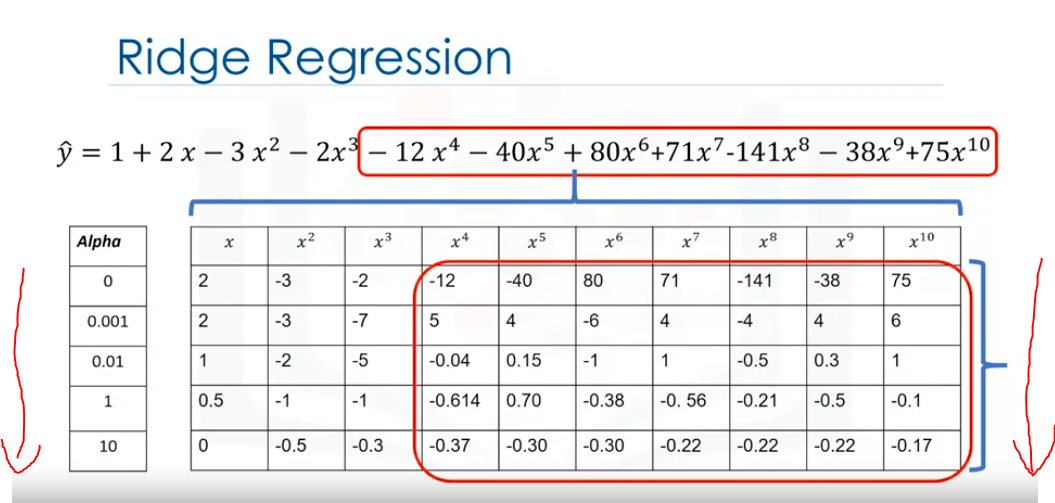
    

- Alpha must be chosen carefully: 
    - If Alpha is too low, then Ridge Regression has lower impact, the model is closer to a regular polynomial regression and possible overfitting.
    - If Alpha is too large, then Ridge Regression has too much impact, the model tends to be underfitting.

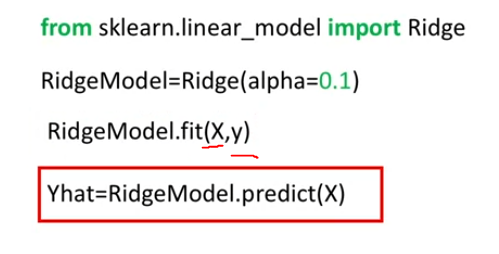

> NOTE: X input needs to be poly transformed using specific poly model with specific order, e.g. 
``` python 
    pr = PolynomialFeatures(degree=5)
    X = pr.fit_transform(x_train[['horsepower']])
```
> The order of polynomial model defines the poly transformed X_input (i.e. 1:1 relationship), so Ridge().fit() model fit only need one input, X, rather than two inputs, X and order of polynomial model.

- To choose Alpha, we use R2:
    - 1. start from lowest Alpha number, e.g. 0.1
    - 2. use train dataset to train ridge regression model
    - 3. use another dataset as **validation dataset**, to compare model prediction vs. true value in this dataset
    - 4. get R2 for prediction
    - 5. iterate above process for different alpha numbers, to get corresponding R2 values.
    - 6. Finally choose the Alpha that maximize the R2 value in validation dataset.
    
    > def'n: If a dataset is used to select the **hyperparameters** (i.e. tune the model), then this dataset is called **validation dataset**, rather than test dataset (test dataset is for testing the entire model performance, e.g. accuracy / R2 / MSE)
    
    > Tips: We can also use other method to find Alpha, e.g. using MSE

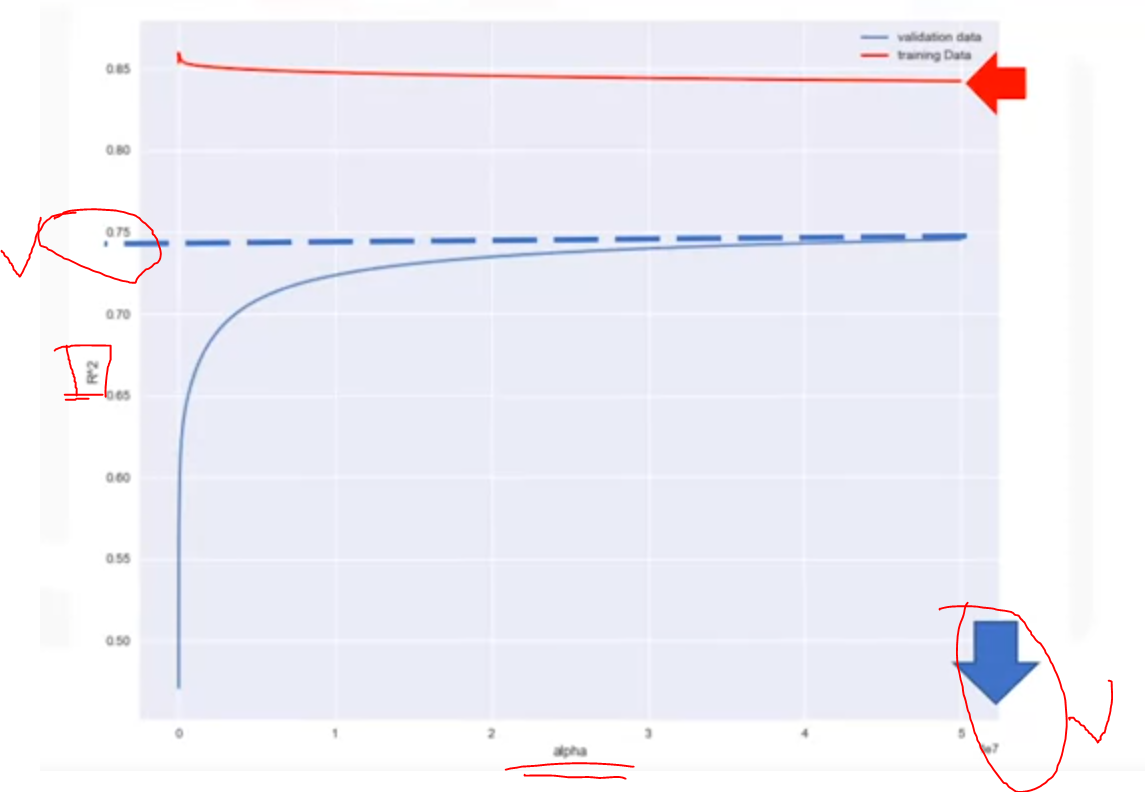

# 4. Grid Search

- Grid Search allows us to fine tune the hyperparameters of the model with a few lines of the code.
- The "Alpha" in Ridge Regression is an example of hyperparameter
- Scikit-learn has a means of auto iterating over a selected options of hyperparameters using cross-validation called "Grid Search"

- Principle:
    - Data was initially split to 3 parts automatically by grid search: Train, Validation, Test
    - Train dataset is used to train the model using a selected hyperparameter from list
    - Validation dataset is used to validate the R2 or MSE of trained model, i.e. check the performance of selected hypermater
    - The above process is iterated until find the max R2 or min MSE, and return the corresponding hyperparameter
    - Test dataset is finally used to test the model accuracy / R2 / MSE (note: this R2 / MSE is performed on the test dataset, it is different from R2 obtained above in validation dataset.
    
> Tips: The benefit of using GridSearchCV from sklearn to perform grid search is that is has cross-validation function: you can specify k-fold in "cv=xxx"

> Also: TBC in Discussion Forum - ?Why we don't do poly transform to the input X data or specify the order of polynomial model when using GridSearch function, but we did so when manually calculate R2 for Alpha in the section above? MY GUESS: Does that mean in the Gridsearch example below, it is not polynomial model, instead it is a Linear Regression model with Ridge alpha? **(BASED ON ANSWERS FROM DISCUSSION FORUM, IT SEEMS MY GUESS IS CORRECT)**
https://www.coursera.org/learn/data-analysis-with-python/discussions/weeks/5/threads/MmVG8DjvEey5TxIokoqxMQ


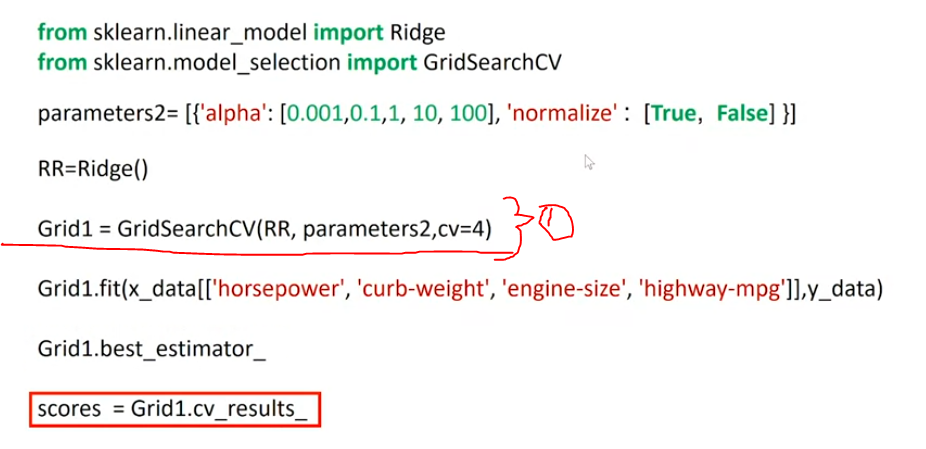

Note: 1. Default validation method is R2 method for "GridSearchCV()" function if not specified